In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [139]:
df = pd.read_csv('dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       900 non-null    float64
 1   1       900 non-null    float64
 2   2       900 non-null    float64
 3   3       900 non-null    float64
 4   4       900 non-null    float64
 5   5       900 non-null    float64
 6   6       900 non-null    float64
 7   7       900 non-null    float64
 8   8       900 non-null    float64
 9   target  900 non-null    float64
dtypes: float64(10)
memory usage: 70.4 KB


In [143]:
df.describe()

,0,1,2,3,4,5,6,7,8,target
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,5.036548,0.504976,493.064463,297.303826,0.507925,49.781970,9507.426024,1.973333,3.436667,9118.263873
std,2.869018,0.289803,290.436017,116.899846,0.286008,28.684840,283.069448,0.788798,1.677367,852.633238
min,0.037452,0.000942,0.969406,100.651192,0.000527,0.185411,9000.096807,1.000000,1.000000,6298.862662
25%,2.518373,0.248575,247.145068,195.239150,0.284926,25.777689,9267.721916,1.000000,2.000000,8627.098283
50%,4.944200,0.524393,497.186526,301.949065,0.501211,49.517510,9500.814515,2.000000,3.000000,9208.588416
75%,7.631981,0.753136,736.572313,399.999965,0.750584,74.538269,9751.394987,3.000000,5.000000,9713.801784
max,9.997094,0.998795,999.208515,499.174221,0.999742,99.926403,9999.499080,3.000000,6.000000,11175.834533


### Building base OLS model

In [144]:
# splitting data into independent and dependent variables
X = df.drop('target', axis = 1)
y = df['target']

In [145]:
# adding constant to the dataframe
Xc = sm.add_constant(X)

In [146]:
# creating train and test data
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.33, random_state=42)

In [147]:
# creating OLS model
model_lr = sm.OLS(y_train, X_train).fit()

# predicting dependent variable
y_pred = model_lr.predict(X_test)

In [175]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     361.6
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          3.65e-234
Time:                        14:55:01   Log-Likelihood:                -4373.7
No. Observations:                 603   AIC:                             8767.
Df Residuals:                     593   BIC:                             8811.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1330.1873    484.572      2.745      0.006     378.501    2281.874
0             15.6541      4.916      3.184      0.002       5.999      25.309
1            208.1956     47.873      4.349      0.000     114.174     302.217
2              1.0192      0.049     20.786      0.000       0.923       1.116
3              0.1074      0.122      0.877      0.381      -0.133       0.348
4          -1982.6856     49.116    -40.367      0.000   -2079.149   -1886.222
5              0.4114      0.499      0.825      0.410      -0.568       1.391
6              0.9590      0.050     19.011      0.000       0.860       1.058
7           -526.3258     18.063    -29.139      0.000    -561.800    -490.851
8             -6.5195      8.321     -0.784      0.434     -22.862       9.823
==============================================================================
Omnibus:                       12.204   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.567
Skew:                          -0.105   Prob(JB):                       0.0227
Kurtosis:                       2.493   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

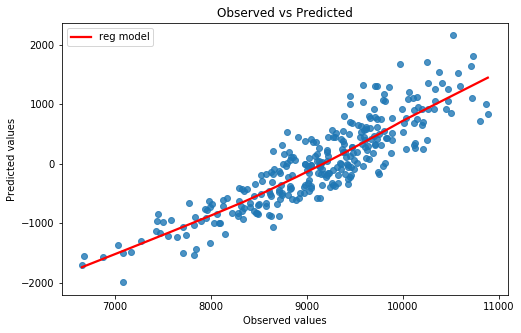

In [172]:
# checking linearity of the model
# plotting regression line using regplot

plt.figure(figsize=(8,5))
sns.regplot(x = y_test, y = y_pred, lowess = True, line_kws={'color':'r','label':'reg model'})
plt.title("Observed vs Predicted")
plt.ylabel("Predicted values")
plt.xlabel("Observed values")
plt.legend()
plt.show()

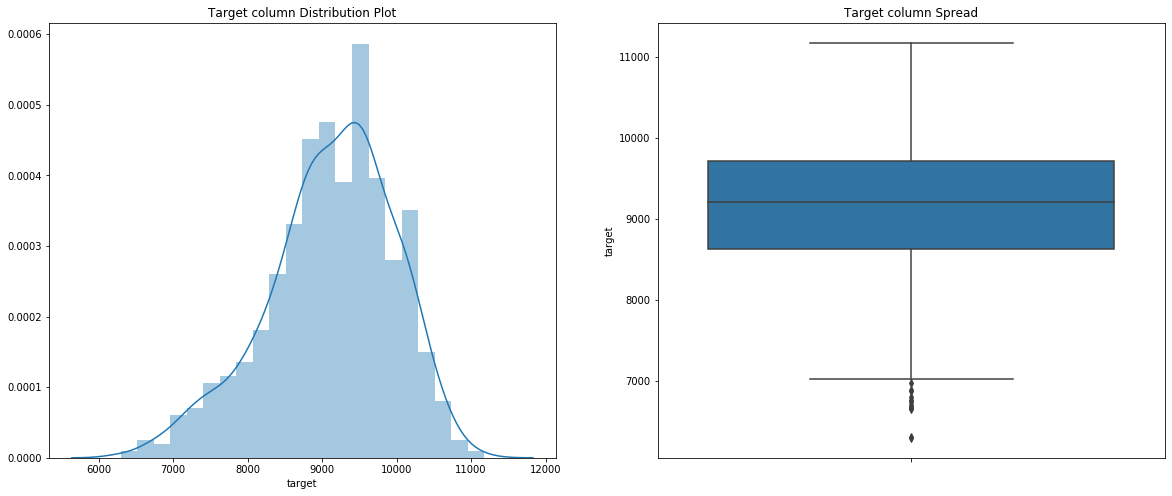

In [182]:
# Visualizing the target column

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Target column Distribution Plot')
sns.distplot(df.target)

plt.subplot(1,2,2)
plt.title('Target column Spread')
sns.boxplot(y=df.target)

plt.show()

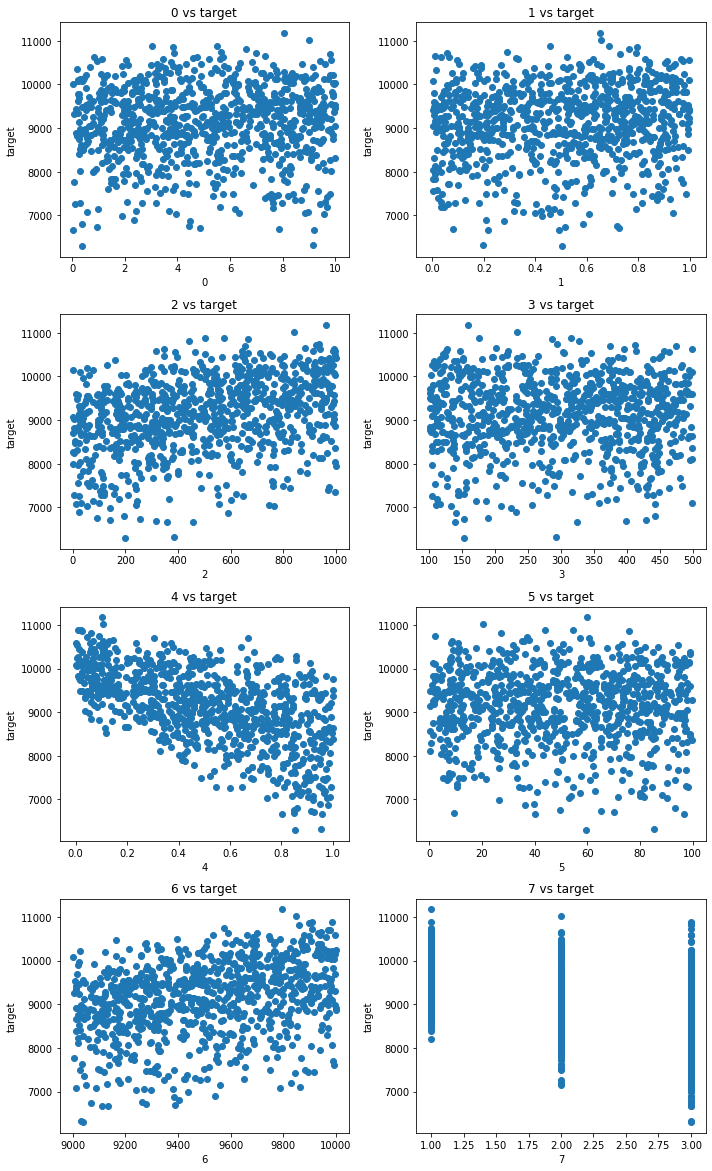

In [183]:
# visualizing the independent variables with target 

def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['target'])
    plt.title(x+' vs target')
    plt.ylabel('target')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('0', 1)
scatter('1', 2)
scatter('2', 3)
scatter('3', 4)
scatter('4', 5)
scatter('5', 6)
scatter('6', 7)
scatter('7', 8)

plt.tight_layout()

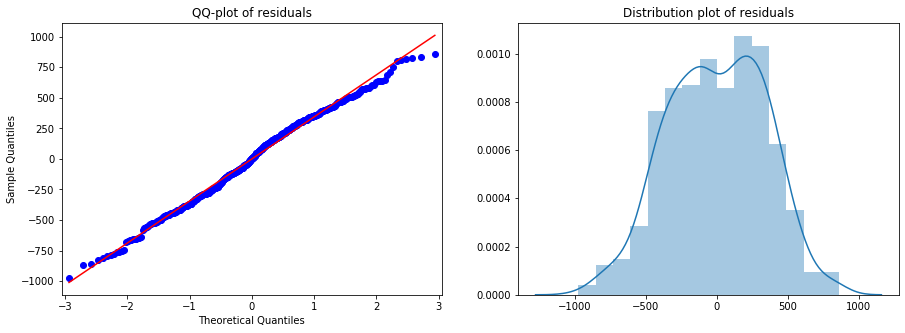

In [177]:

# visualizing the normality of residuals using QQ plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
sm.qqplot(model_lr.resid, line='r', ax=ax[0])
sns.distplot(model_lr.resid, ax=ax[1])
ax[0].set_title("QQ-plot of residuals")
ax[1].set_title("Distribution plot of residuals")
plt.show()

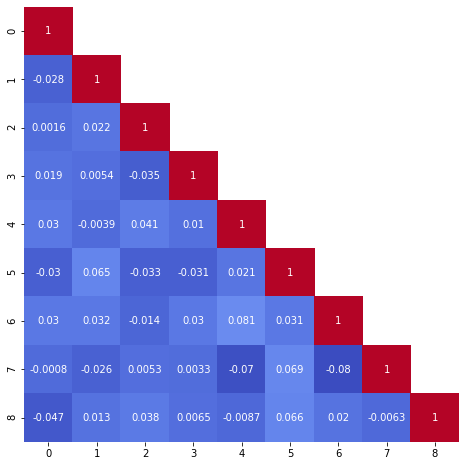

In [178]:
# correlation matrix of independent variables
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", square=True, mask=np.triu(X.corr(),1), cbar=False)
plt.show()